In [61]:
%reset -f

In [62]:
# Setting the figure size to a bigger one than the default
from matplotlib import rcParams
rcParams['figure.figsize'] = (10, 6)
rcParams['legend.fontsize'] = 16
rcParams['axes.labelsize'] = 16
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score 
from sklearn import neighbors
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet, HuberRegressor, RANSACRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline


# Load Data and first glance with pandas

In [63]:
# Read about the dataset here https://samyzaf.com/ML/song_year/song_year.html

# Load the data from the file
# data = pd.read_csv('/Users/ignaciopastorebenaim/Documents/MGRCV/TPs/ML/Lab1/data/YearPredictionMSD.csv')

features = ['year', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 't11', 't12', 't13', 't14', 't15', 't16', 't17', 't18', 't1 9', 't20', 't21', 't22', 't23', 't24', 't25', 't26', 't27', 't28', 't29', 't30', 't31', 't32', 't33', 't34', 't35', 't36 ', 't37', 't38', 't39', 't40', 't41', 't42', 't43', 't44', 't45', 't46', 't47', 't48', 't49', 't50', 't51', 't52', 't53' , 't54', 't55', 't56', 't57', 't58', 't59', 't60', 't61', 't62', 't63', 't64', 't65', 't66', 't67', 't68', 't69', 't70', 't71', 't72', 't73', 't74', 't75', 't76', 't77', 't78', 't79', 't80', 't81', 't82', 't83', 't84', 't85', 't86', 't87', 't88', 't89', 't90']

# Load the data from the file
data = pd.read_csv('/Users/ignaciopastorebenaim/Documents/MGRCV/TPs/ML/Lab1/data/YearPredictionMSD.csv'
                , header=0
                  , names=features
                   )

# First look at the dataset
print(data.info())  
print(data.describe())  
print(data.head())

# If you want to see the total number of missing values in the entire dataset
total_missing_values = data.isna().sum().sum()
print(f"Total number of missing values in the dataset: {total_missing_values}")

# Convert to numpy array
data = data.to_numpy()


# Extract features (X) and labels (y)
X = data[:, 1:]
y = data[:, 0]   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 91 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    50000 non-null  int64  
 1   t1      50000 non-null  float64
 2   t2      50000 non-null  float64
 3   t3      50000 non-null  float64
 4   t4      50000 non-null  float64
 5   t5      50000 non-null  float64
 6   t6      50000 non-null  float64
 7   t7      50000 non-null  float64
 8   t8      50000 non-null  float64
 9   t9      50000 non-null  float64
 10  t10     50000 non-null  float64
 11  t11     50000 non-null  float64
 12  t12     50000 non-null  float64
 13  t13     50000 non-null  float64
 14  t14     50000 non-null  float64
 15  t15     50000 non-null  float64
 16  t16     50000 non-null  float64
 17  t17     50000 non-null  float64
 18  t18     50000 non-null  float64
 19  t1 9    50000 non-null  float64
 20  t20     50000 non-null  float64
 21  t21     50000 non-null  float64
 22

# Visualize

Data Shape:  (50000, 91)
X Shape:  (50000, 90)
y Shape:  (50000,)


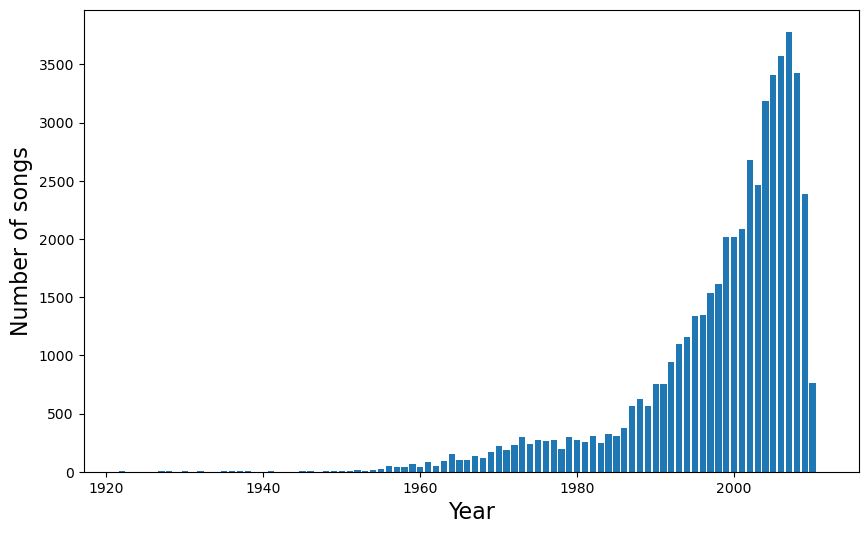

In [64]:
# Print shapes
print("Data Shape: ", data.shape)
print("X Shape: ", X.shape)
print("y Shape: ", y.shape)

# Number of songs per year
years = np.arange(1922, 2012)
nsongs = np.array([np.sum(y == year) for year in years])

# Bar plot
plt.bar(years, nsongs, align='center')
plt.xlabel("Year")
plt.ylabel("Number of songs")
plt.show()

# Split in Train, validate and test

In [65]:

# split the data in training, validation and test sets
X_train_and_val, X_test, y_train_and_val, y_test = train_test_split(X, y, test_size = 0.1, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X_train_and_val, y_train_and_val, test_size = 0.1, random_state=7)

print('# training samples: ', X_train.shape[0])
print('# validation samples: ', X_val.shape[0])
print('# test samples: ', X_test.shape[0])

# training samples:  40500
# validation samples:  4500
# test samples:  5000


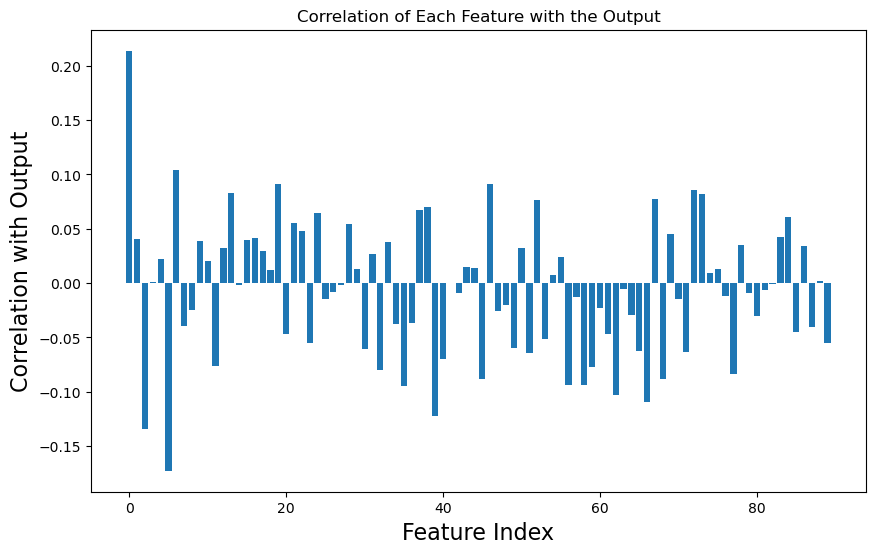

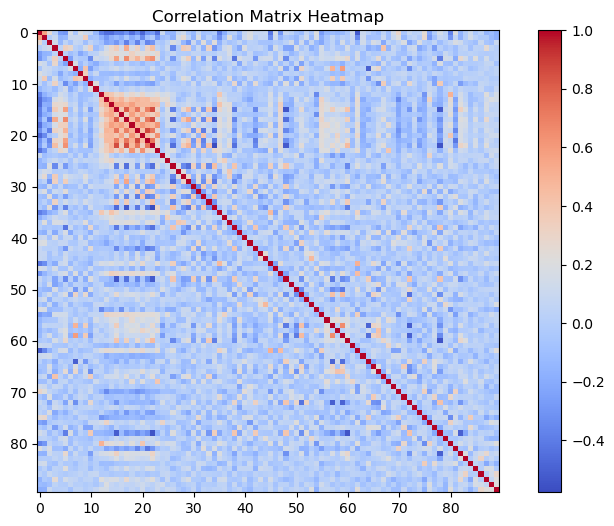

In [66]:
# Compute the correlation between each feature in X_train and y_train
correlations = []
for i in range(X_train.shape[1]):
  corr, _ = pearsonr(X_train[:, i], y_train)
  correlations.append(corr)


# Plot the correlations
plt.bar(range(len(correlations)), correlations)
plt.xlabel('Feature Index')
plt.ylabel('Correlation with Output')
plt.title('Correlation of Each Feature with the Output')
plt.show()

# Compute the correlation matrix
corr_matrix = np.corrcoef(X_train, rowvar=False)

# Plot the heatmap
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('Correlation Matrix Heatmap')
plt.show()



Filtered correlations:  [ 0.2138639  -0.13378628 -0.1726307   0.10369488 -0.12262817 -0.10302805
 -0.10940603]
Filtered indexes:  [ 0  2  5  6 39 62 66]


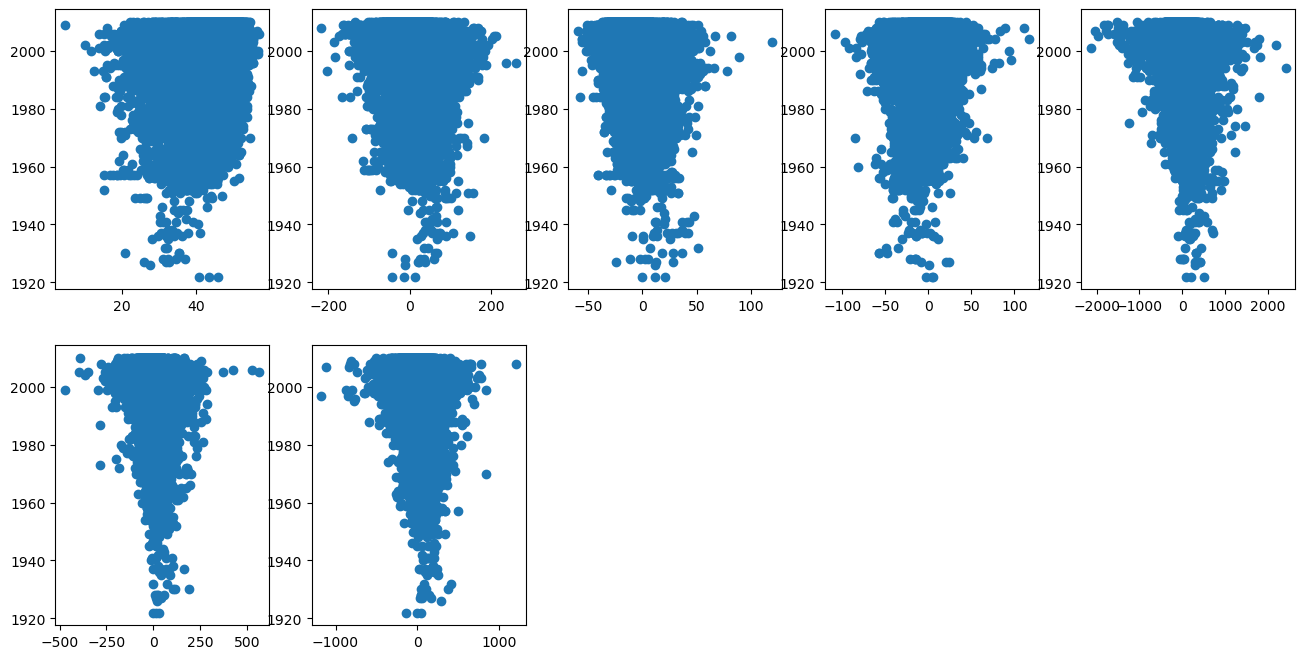

In [67]:
# Convert the list to a numpy array for easier handling
correlations = np.array(correlations)

# Filter correlations with a threshold of 0.1
threshold = 0.1
filtered_indices = np.where(np.abs(correlations) >= threshold)[0]
filtered_correlations = correlations[filtered_indices]

print("Filtered correlations: ", filtered_correlations)
print("Filtered indexes: ", filtered_indices)


plt.figure(figsize=(16, 8))
for i, feature_index in enumerate(filtered_indices):
  plt.subplot(2, 5, i+1)
  plt.scatter(X_train[:,feature_index],y_train)

# Pipeline and scoring for all Gridsearchs for polynomialFeatures = 1

In [69]:
# Define the pipeline with PolynomialFeatures and PCA
pipeline = ImbPipeline([
    ('oversampler', RandomOverSampler(random_state=42)),
    ('scaler', StandardScaler()),
    ('pca', PCA()),  # Optionally add PCA for dimensionality reduction
    ('model', Ridge())  # Temporary model placeholder for GridSearch
])

# Define the scoring metrics
scoring_metrics = {
    'MSE': 'neg_mean_squared_error',       # Mean Squared Error
    'MAE': 'neg_mean_absolute_error',      # Mean Absolute Error
    'R2': 'r2',                            # R² Score
    'MedAE': 'neg_median_absolute_error',  # Median Absolute Error
}



# Gridsearch

In [74]:

# Define the parameter grid for multiple models and degrees of polynomial features
param_grid = [
    {
        'pca__n_components': [0.9, 0.95, 0.99],  # PCA components retaining different amounts of variance
        'model': [Ridge()],
        'model__alpha': [0.1, 1.0, 10.0]  # Different Ridge regression alpha values
    },
    {
        'pca__n_components': [0.90, 0.95, 0.99],
        'model': [Lasso()],
        'model__alpha': [0.1, 1.0, 10.0]  # Lasso regularization strength
    }, 
        {
        'pca__n_components': [0.90, 0.95, 0.99],
        'model': [ElasticNet()],
        'model__alpha': [0.1, 1.0, 10.0],  # ElasticNet alpha values
        'model__l1_ratio': [0.1, 0.5, 0.9]  # Mix of Lasso (L1) and Ridge (L2)
    },
    # {
    #     'pca__n_components': [0.90, 0.95, 0.99],
    #     'model': [SVR()],
    #     'model__C': [0.1, 1.0, 10.0],  # SVR regularization parameter
    #     'model__kernel': ['linear', 'rbf']  # Try both linear and RBF kernels
    # },
    {
        'pca__n_components': [0.90, 0.95, 0.99],
        'model': [RandomForestRegressor()],
        'model__n_estimators': [50, 100, 200],  # Number of trees in the forest
        'model__max_depth': [10, 20, None]  # Maximum depth of the trees
    },
    {
        'pca__n_components': [0.90, 0.95, 0.99],
        'model': [GradientBoostingRegressor()],
        'model__n_estimators': [100, 200],  # Number of boosting stages
        'model__learning_rate': [0.01, 0.1, 0.5],  # Learning rate
        'model__max_depth': [3, 5, 10]  # Maximum depth of individual estimators
    },
        {
        'pca__n_components': [0.90, 0.95, 0.99],
        'model': [HuberRegressor()],
        'model__alpha': [0.0001, 0.001, 0.01],
        'model__epsilon': [1.35, 1.5, 2.0]  # Robustness parameter for HuberRegressor
    },
    {
        'pca__n_components': [0.90, 0.95, 0.99],
        'model': [RANSACRegressor()],
        'model__min_samples': [0.5, 0.7, 0.9],  # Minimum samples for RANSAC
        'model__residual_threshold': [5.0, 10.0, 15.0]  # Tolerance for inlier classification
    },
    {
        'pca__n_components': [0.90, 0.95, 0.99],
        'model': [neighbors.KNeighborsRegressor()],
        'model__n_neighbors': [5, 10, 15],  # Number of neighbors
        'model__weights': ['uniform', 'distance'],  # Weight function
        'model__p': [1, 2]  # Power parameter for the Minkowski metric
    }

]

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5,
                            scoring=scoring_metrics, refit='MAE', verbose=3, 
                            return_train_score=True, 
                            n_jobs=6, 
                            pre_dispatch='2*n_jobs'
                            )

# Fit the model
# Fit the pipeline
grid_search.fit(X_train, y_train)

# Best model and hyperparameters
print("Best model:", grid_search.best_estimator_)
print("Best hyperparameters:", grid_search.best_params_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5] END model=Ridge(), model__alpha=0.1, pca__n_components=0.9; MAE: (train=-16.339, test=-16.227) MSE: (train=-393.449, test=-387.285) MedAE: (train=-14.863, test=-14.888) R2: (train=-2.460, test=-2.336) total time=   1.4s
[CV 2/5] END model=Ridge(), model__alpha=0.1, pca__n_components=0.9; MAE: (train=-16.358, test=-16.568) MSE: (train=-391.408, test=-396.595) MedAE: (train=-15.044, test=-15.400) R2: (train=-2.445, test=-2.404) total time=   1.5s
[CV 5/5] END model=Ridge(), model__alpha=0.1, pca__n_components=0.9; MAE: (train=-16.352, test=-16.165) MSE: (train=-391.461, test=-383.412) MedAE: (train=-15.033, test=-14.899) R2: (train=-2.404, test=-2.456) total time=   1.6s
[CV 3/5] END model=Ridge(), model__alpha=0.1, pca__n_components=0.9; MAE: (train=-15.989, test=-16.042) MSE: (train=-375.285, test=-378.241) MedAE: (train=-14.559, test=-14.767) R2: (train=-2.279, test=-2.341) total time=   1.7s
[CV 4/5] END model=R

KeyboardInterrupt: 

In [55]:
# Define the pipeline for Ridge with PolynomialFeatures of degree 2
pipeline_poly2 = ImbPipeline([
    ('oversampler', RandomOverSampler(random_state=42)),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),  # Apply PCA to reduce dimensionality
    ('poly', PolynomialFeatures(degree=2)),  # Add polynomial features step with degree 2
    ('model', Ridge(alpha=1.0))  # Ridge model with alpha=1.0
])

# Fit the pipeline
pipeline_poly2.fit(X_train, y_train)

# Evaluate on validation set
y_pred = pipeline_poly2.predict(X_val)
mae = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(f"MAE on validation set: {mae}")
print(f"R² on validation set: {r2}")

MAE on validation set: 349.6674313149425
R² on validation set: -2.177751228100535


In [ ]:
# Initialize the DataFrames to store the results
results_validation = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'R2', 'Fit Time', 'Score Time'])
results_cross_validation = pd.DataFrame(columns=['Model', 'Mean MSE', 'Mean MAE', 'Mean R2', 'Fit Time', 'Score Time'])

# Function to append new results as separate rows
def append_result(list_name, model, mse, mae, r2, fit_time, score_time):
    global results_validation
    global results_cross_validation

    new_row = {
        'Model': model,
        'MSE': mse,
        'MAE': mae,
        'R2': r2,
        'Fit Time': fit_time,
        'Score Time': score_time,
    }

    if list_name == 'results_validation':
        results_validation = results_validation.append(new_row, ignore_index=True)
    elif list_name == 'results_cross_validation':
        results_cross_validation = results_cross_validation.append(new_row, ignore_index=True)


# Access the cross-validation results for all metrics
cv_results = grid_search.cv_results_

# Loop over the results and extract key metrics (MSE, MAE, R², Fit Time, etc.)
for idx in range(len(cv_results['params'])):
    # Extract relevant metrics
    model_name = cv_results['params'][idx]
    mean_mse = -cv_results['mean_test_MSE'][idx]  # Convert negative MSE to positive
    std_mse = cv_results['std_test_MSE'][idx]
    mean_mae = -cv_results['mean_test_MAE'][idx]
    mean_r2 = cv_results['mean_test_R2'][idx]
    fit_time = cv_results['mean_fit_time'][idx]
    score_time = cv_results['mean_score_time'][idx]
    
    # Append the results for each model
    append_result(
        'results_cross_validation',
        model_name,
        mean_mse,
        mean_mae,
        mean_r2,
        fit_time,
        score_time
    )

# Display the cross-validation results
print(results_cross_validation)

# Convert the DataFrame to LaTeX
latex_table = results_cross_validation.to_latex(
    index=False, 
    column_format='|l|l|l|l|c|c|',  # Custom column alignment and borders
    float_format="%.3f",            # Ensure floating point numbers use 3 decimals
    bold_rows=True,                 # Bold the header row
    longtable=False,                # Use standard table format
    caption="Cross-validation performance metrics and timing for each model.",  # Add caption
    label="tab:cross_validation",   # Add label for referencing
    escape=False                    # Prevent LaTeX special characters from being escaped
)

# Save the table to a .tex file
with open('../deliverable/tables/results_cross_validation.tex', 'w') as f:
    f.write(latex_table)